In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

#-------------------------------------------Load Weight----------------------------------------------------
from tensorflow.keras.models import model_from_json

cnn = model_from_json(open("/content/drive/MyDrive/cnn.json", "r").read())
cnn.load_weights('/content/drive/MyDrive/Orange_Fruit_Weights_cnn.h5')
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
#-----------------------vgg-----------------
model = model_from_json(open("/content/drive/MyDrive/vgg.json", "r").read())  
model.load_weights('/content/drive/MyDrive/Orange_Fruit_Weights_vgg.h5')
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
#-----------------------mobilenet----------
model1 = model_from_json(open("/content/drive/MyDrive/mobile.json", "r").read())  
model1.load_weights('/content/drive/MyDrive/Orange_Fruit_Weights_mobile.h5')
model1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
#-----------------------Lenet--------------
cnn2 = model_from_json(open("/content/drive/MyDrive/lenet.json", "r").read())  
cnn2.load_weights('/content/drive/MyDrive/Orange_Fruit_Weights_lenet.h5')
cnn2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
#------------------------------------------------------------------------------------------


In [ ]:
import numpy as np
from keras.preprocessing import image
p=r"/content/drive/MyDrive/Pred/16app_240.jpg"
img = image.load_img(p, target_size = (64, 64))
test_image = image.img_to_array(img)
test_image = np.expand_dims(test_image, axis = 0)
test_image/=255.0
result = cnn.predict(test_image)
print("---- By CNN ----")
if result<0.5:
  print('Selected Fruit is Orange') 
else:
  print('Selected Fruit is Other than Orange')

result_vgg = model.predict(test_image)
print("---- By VGG ----")
if result_vgg<0.5:
  print('Selected Fruit is Orange') 
else:
  print('Selected Fruit is Other than Orange')

result_mobile = model1.predict(test_image)
print("---- By MobileNet ----")
if result_mobile<0.5:
  print('Selected Fruit is Orange') 
else:
  print('Selected Fruit is Other than Orange')

result_lenet = cnn2.predict(test_image)
print("---- By LeNet ----")
if result_lenet<0.5:
  print('Selected Fruit is Orange') 
else:
  print('Selected Fruit is Other than Orange')


---- By CNN ----
Selected Fruit is Other than Orange
---- By VGG ----
Selected Fruit is Other than Orange
---- By MobileNet ----
Selected Fruit is Other than Orange
---- By LeNet ----
Selected Fruit is Other than Orange


------ CNN ------


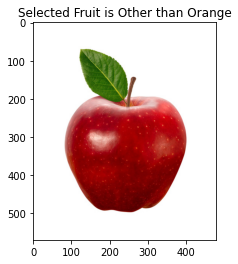

------ VGG-19 ------


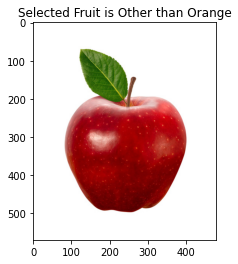

------ MobileNet_V2 ------


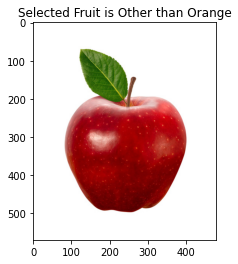

------ LeNet ------


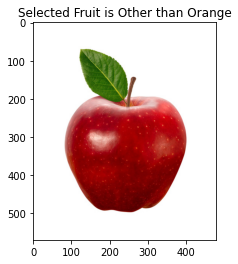

In [ ]:
from matplotlib import pyplot as plt
def show(pred,img):

  if pred<0.5: str = 'Selected Fruit is Orange'
  else: str = 'Selected Fruit is Other than Orange'

  plt.imshow(img)
  plt.axis('on')
  plt.title(str)
  plt.show()
img = image.load_img(p)
print("------ CNN ------")
show(result,img)
print("------ VGG-19 ------")
show(result_vgg,img)
print("------ MobileNet_V2 ------")
show(result_mobile,img)
print("------ LeNet ------")
show(result_lenet,img)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

val_datagen = ImageDataGenerator(rescale=1./255)

val_set = val_datagen.flow_from_directory( r'/content/drive/MyDrive/New Orange Images Dataset/orange testing',
                                          target_size=(64,64),
                                          batch_size=32,
                                          class_mode='binary')

Found 500 images belonging to 2 classes.
Found 320 images belonging to 2 classes.


In [ ]:
from sklearn import metrics
import sklearn
predictions = cnn.predict(val_set)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = val_set.classes
class_labels = list(val_set.class_indices.keys())  
report = sklearn.metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


                   precision    recall  f1-score   support

          Oranges       0.50      1.00      0.67       160
Other than orange       0.00      0.00      0.00       160

         accuracy                           0.50       320
        macro avg       0.25      0.50      0.33       320
     weighted avg       0.25      0.50      0.33       320



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn import metrics
import sklearn
predictions = model.predict(val_set)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = val_set.classes
class_labels = list(val_set.class_indices.keys())  
report = sklearn.metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


                   precision    recall  f1-score   support

          Oranges       0.50      1.00      0.67       160
Other than orange       0.00      0.00      0.00       160

         accuracy                           0.50       320
        macro avg       0.25      0.50      0.33       320
     weighted avg       0.25      0.50      0.33       320



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
